# DC Motor Simulation

Look at the dynamics_model.pdf for the explanation behind this code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

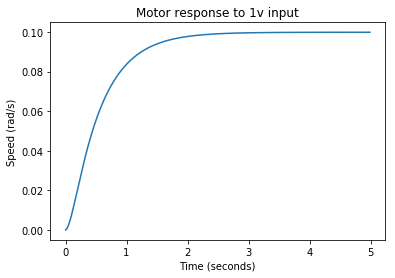

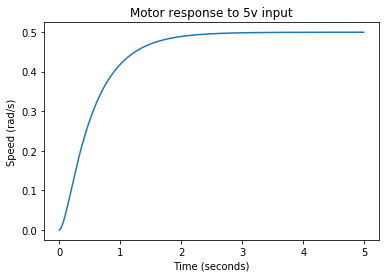

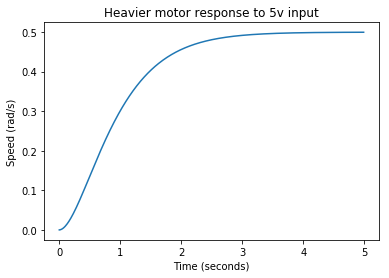

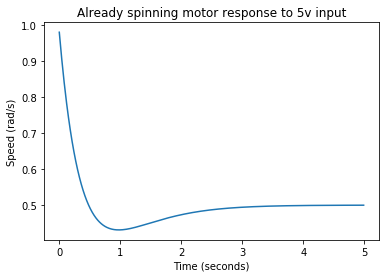

In [2]:
def simulate(V, J, b, K, R, L, theta_dot=0, i=0):
    # simulate T seconds
    T = 5
    dt = 0.01
    ts = np.arange(0, T, dt)
    theta_dots = np.zeros(ts.shape[0])
    currents = np.zeros(ts.shape[0])
    for idx, t in enumerate(ts):
        A = np.array([[-b/J,K/J],[-K/L,-R/L]])
        B = np.array([0, 1/L])
        x = np.array([theta_dot, i])
        w = V(t, i, theta_dot)
        x_dot = A@x+B*w
#         print(x_dot, theta_dot, i)
        theta_dot += (x_dot[0] * dt)
        i += (x_dot[1] * dt)
        theta_dots[idx] = theta_dot
        currents[idx] = i
    
    return ts, theta_dots, currents

def const_V(v):
    def _v(t, i, theta_dot):
        return v
    return _v

ts, theta_dots, _ = simulate(const_V(1), J=0.01, b=0.1, K=0.01, R=1, L=0.5)
plt.figure()
plt.plot(ts, theta_dots)
plt.title("Motor response to 1v input")
plt.ylabel("Speed (rad/s)")
plt.xlabel("Time (seconds)")

ts, theta_dots, _ = simulate(const_V(5), J=0.01, b=0.1, K=0.01, R=1, L=0.5)
plt.figure()
plt.plot(ts, theta_dots)
plt.title("Motor response to 5v input")
plt.ylabel("Speed (rad/s)")
plt.xlabel("Time (seconds)")

ts, theta_dots, _ = simulate(const_V(5), J=0.05, b=0.1, K=0.01, R=1, L=0.5)
plt.figure()
plt.plot(ts, theta_dots)
plt.title("Heavier motor response to 5v input")
plt.ylabel("Speed (rad/s)")
plt.xlabel("Time (seconds)")

ts, theta_dots, _ = simulate(const_V(5), J=0.05, b=0.1, K=0.01, R=1, L=0.5, theta_dot=1)
plt.figure()
plt.plot(ts, theta_dots)
plt.title("Already spinning motor response to 5v input")
plt.ylabel("Speed (rad/s)")
plt.xlabel("Time (seconds)")

plt.show()

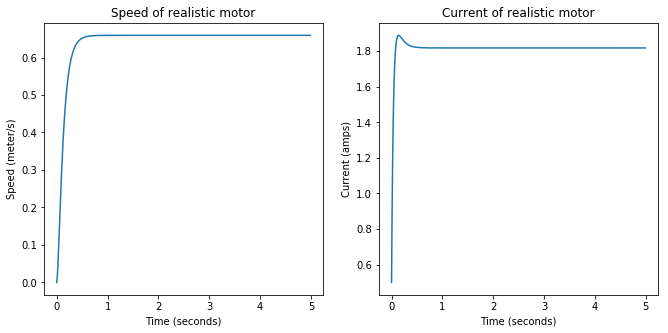

In [3]:
ts, theta_dots, currents = simulate(const_V(5), J=0.00005, b=0.0004, K=0.01, R=2.5, L=0.1)

plt.figure(figsize=(11,5))
plt.subplot(121)
plt.plot(ts, theta_dots * 0.0145)
plt.title("Speed of realistic motor")
plt.ylabel("Speed (meter/s)")
plt.xlabel("Time (seconds)")

plt.subplot(122)
plt.plot(ts, currents)
plt.title("Current of realistic motor")
plt.ylabel("Current (amps)")
plt.xlabel("Time (seconds)")
plt.show()

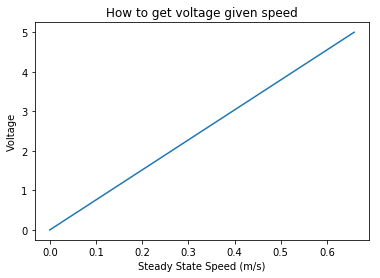

slope: 7.58621, intercept: 0.00000


In [4]:
speeds = []
voltages = np.linspace(0, 5, 255)
for v in voltages:
    def vfunc(*args):
        return v
    speed_mps = simulate(vfunc, J=0.00005, b=0.0004, K=0.01, R=2.5, L=0.1)[1][-1] * 0.0145
    speeds.append(speed_mps)

plt.plot(speeds, voltages)
plt.ylabel("Voltage")
plt.xlabel("Steady State Speed (m/s)")
plt.title("How to get voltage given speed")
plt.show()
    
m = (voltages[1]-voltages[0])/(speeds[1]-speeds[0])
b = speeds[0]

print("slope: {:0.5f}, intercept: {:0.5f}".format(m, b))

we can use the slope of this line as our feed forward slope
We just need to convert from $\frac{v}{m*s^{-1}}$ to $\frac{f}{rad*s^{-1}}$

$$ \frac{\text{volts}}{m*s^{-1}}*\frac{255\text{ abstract force}}{5\text{ volts}}*\frac{0.0145\text{ meters}}{\text{radians}} $$

The invert this value.

In [16]:
m_ = m * 255.0 / 5 * 0.0145
print("ff slope for going from mps -> volts is : ", m)
print("ff slope for going from rps -> abstract force is : ", m_)

cps = 2.77777
mps = cps * 0.18
rps = mps / 0.0145
v = mps * m_

print("cps", cps)
print("mps", mps)
print("rps", rps)
print("volts", v)

ff slope for going from mps -> volts is :  7.58620689655
ff slope for going from rps -> abstract force is :  5.61
cps 2.77777
mps 0.49999859999999996
rps 34.48266206896551
volts 2.804992146


Desired Speed (cps) 2.77777
...           (mps) 0.49999859999999996
...           (rps) 34.48266206896551
Volts required to acheive that speed (volts) 3.79309282759


Simulation result of that voltage


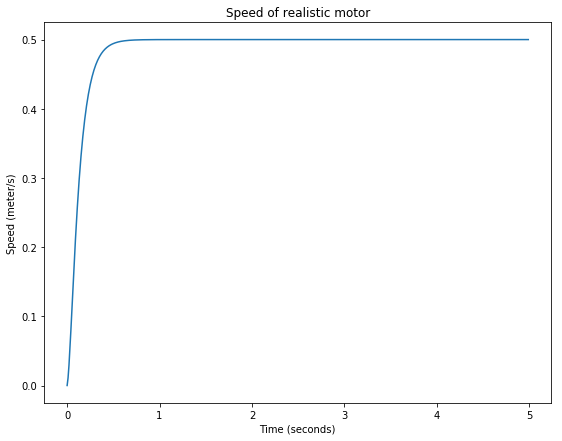

In [14]:

cps = 2.77777
mps = cps * 0.18
rps = mps / 0.0145
v = mps * m

print("Desired Speed (cps)", cps)
print("...           (mps)", mps)
print("...           (rps)", rps)
print("Volts required to acheive that speed (volts)", v)

ts, theta_dots, currents = simulate(const_V(v), J=0.00005, b=0.0004, K=0.01, R=2.5, L=0.1)

print("\n\nSimulation result of that voltage")
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.plot(ts, theta_dots * 0.0145)
plt.title("Speed of realistic motor")
plt.ylabel("Speed (meter/s)")
plt.xlabel("Time (seconds)")
plt.show()